# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

#Jacob R. Bowers
#SIU855784255

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Telecom_data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.


In [1]:
#Jacob R. Bowers
#SIU855784255

#Heading Imports + Dataset Path
from __future__ import print_function 
import os 
path_of_dataset = ['data'] 

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [2]:
import pandas as pd
dataset = os.sep.join(path_of_dataset + ['Telecom_data.csv'])
df = pd.read_csv(dataset)
#write your code here

df = df.drop(['state','phone_number','area_code'], axis=1)

#Write the explanation of the second part of Question 1 here

In [3]:
#write your code here
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,152,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,61,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,109,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [4]:
#Explanation

In [ ]:
#Removing the state, phone_number, and area_code may be useful depending on the situtation. 
#If you are trying to analyse the coorelation between living in a particular state/area_code and total_day_calls, you'll will need that information.
#With that being said you certainly want to remove as many columns as possible to avoid overfitting.

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded. We applied LabelBinarizer for that. You don't need to change anything for that.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [5]:
import sklearn
from sklearn.preprocessing import LabelBinarizer

LabelBin = LabelBinarizer()

for nonnum in ['intl_plan', 'voice_mail_plan','churned']:
    df[nonnum] = LabelBin.fit_transform(df[nonnum])

In [6]:
#write your code here. print the dataset head.
df.head

<bound method NDFrame.head of       account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0                128          0                1                     25   
1                107          0                1                     26   
2                137          0                0                      0   
3                 84          1                0                      0   
4                 75          1                0                      0   
...              ...        ...              ...                    ...   
4995              50          0                1                     40   
4996             152          0                0                      0   
4997              61          0                0                      0   
4998             109          0                0                      0   
4999              86          0                1                     34   

      total_day_minutes  total_day_calls  total_day_charge  total_eve

In [7]:
import warnings
warnings.filterwarnings('ignore',module='sklearn')
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

#write your code here
mm = MinMaxScaler()
df = pd.DataFrame(mm.fit_transform(df),columns = df.columns)

In [8]:
#write your code here. print the dataset head.
df.head

<bound method NDFrame.head of       account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0           0.524793        0.0              1.0               0.480769   
1           0.438017        0.0              1.0               0.500000   
2           0.561983        0.0              0.0               0.000000   
3           0.342975        1.0              0.0               0.000000   
4           0.305785        1.0              0.0               0.000000   
...              ...        ...              ...                    ...   
4995        0.202479        0.0              1.0               0.769231   
4996        0.623967        0.0              0.0               0.000000   
4997        0.247934        0.0              0.0               0.000000   
4998        0.446281        0.0              0.0               0.000000   
4999        0.351240        0.0              1.0               0.653846   

      total_day_minutes  total_day_calls  total_day_charge  total_eve

## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [9]:
#write your code here
features = (x for x in df.columns if x != 'churned')

In [10]:
from sklearn.neighbors import KNeighborsClassifier

x_data = df[features]
y_data = df['churned']

x_data.head()
y_data.head()

#write your code here


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(x_data, y_data)
y_predict = knn.predict(x_data.values)

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [11]:
def model_accuracy(real,predict):
    return sum(real == predict) / float(real.shape[0])

In [12]:
#write your code here
print(model_accuracy(y_data, y_predict))

0.9422


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3`, but we want to apply a strategy through which the distance of neighbors will be counted or valued. So, this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [13]:
#write your code here
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn = knn.fit(x_data, y_data)
prediction = knn.predict(x_data)

print (model_accuracy (y_data,prediction))

knn = KNeighborsClassifier(n_neighbors = 3, p = 1)
knn = knn.fit(x_data, y_data)
prediction = knn.predict(x_data.values)

print (model_accuracy(y_data, prediction))

1.0
0.9456


#write your explanation here



In [14]:
#write your code here
#If the weighted distance returns 1.0 it means the code is overfitting to the data as every single point is a cluster. 

## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [15]:
#write your code here
li = list()

In [16]:
#write your code here
for k in range (1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn = knn.fit(x_data, y_data)
    pred = knn.predict(x_data.values)
    
    result = model_accuracy(y_data, pred)
    li.append((k,result))

In [17]:
li

[(1, 1.0),
 (2, 0.9292),
 (3, 0.9422),
 (4, 0.9154),
 (5, 0.9284),
 (6, 0.9156),
 (7, 0.9254),
 (8, 0.9122),
 (9, 0.9224),
 (10, 0.9092),
 (11, 0.9158),
 (12, 0.9076),
 (13, 0.9148),
 (14, 0.905),
 (15, 0.9098),
 (16, 0.9044),
 (17, 0.908),
 (18, 0.9028),
 (19, 0.9078),
 (20, 0.902)]

[Text(0.5, 1.0, 'Accuracy vs k'), Text(0.5, 0, 'k'), Text(0, 0.5, 'Accuracy')]

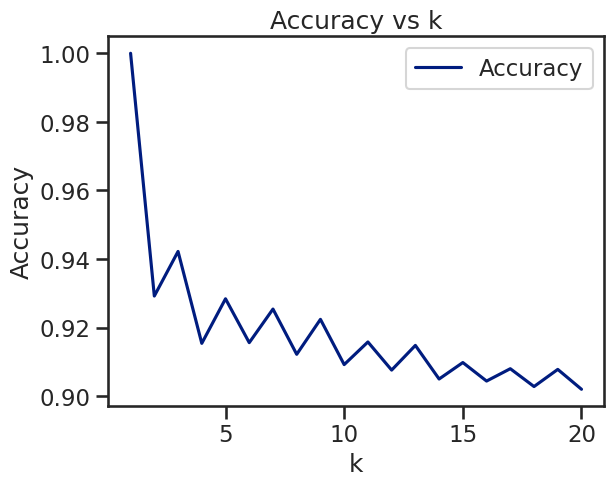

In [18]:
df2 = pd.DataFrame(li, columns = ['k','Accuracy'])

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

plt = df2.set_index('k').plot()


plt.set(title = 'Accuracy vs k', xlabel = 'k', ylabel = 'Accuracy')

#write your explanation here

In [ ]:
#If you were to put K=1 it would make every single data point a cluster.